<a href="https://colab.research.google.com/github/p25-c4/kurly_project/blob/main/0320_HY_combined_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

In [ ]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
# 날짜 데이터 생성
from datetime import datetime
# 선형 회귀분석 (절편(intercept) 추가)
import statsmodels.api as sm
# 자기상관 함수, 부분 자기상관 함수
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# ARIMA
from statsmodels.tsa.arima.model import ARIMA
# auto_arima
from pmdarima import auto_arima

from statsmodels.tsa.statespace.sarimax import SARIMAX

from pandas.plotting import register_matplotlib_converters


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 맑은 고딕 적용
matplotlib.rc('font', family = 'NanumGothic')
# 음수 표시
matplotlib.rc('axes', unicode_minus = False)

In [ ]:
df = pd.read_csv("kurly.csv")
df.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,Date,Year,Month,Day,Hour,CleanedItemName,TimeBetweenOrders,Combined,Weekday,WeekdayName
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,...,2021-12-03,2021,12,3,20,이츠웰 후르츠칵테일 과일통조림 3k 슬라이스,3 days 09:06:40,"2030s, 여성",4,Friday
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,...,2021-12-03,2021,12,3,20,베지가든 수제교자만두 매콤한 김치맛 720g 360gx2개입,3 days 09:06:40,"2030s, 여성",4,Friday
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,...,2021-12-03,2021,12,3,20,매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉,3 days 09:06:40,"2030s, 여성",4,Friday
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,...,2021-12-03,2021,12,3,20,계양구 배달 싱싱한 방울토마토 750g 작전 과일나라,3 days 09:06:40,"2030s, 여성",4,Friday
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,...,2021-12-03,2021,12,3,20,낙지호롱 900g 20 25개 낙지꼬치구이 냉동낙지 양념소스70gx1팩 제공,3 days 09:06:40,"2030s, 여성",4,Friday


In [ ]:
df['OrderDT'] = pd.to_datetime(df['OrderDT'])
df['YearMonthStr'] = df['OrderDT'].dt.strftime('%Y-%m')
df.head()

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT,Delay_YN,ItemLargeCode,ItemLargeName,ItemMiddleCode,...,Year,Month,Day,Hour,CleanedItemName,TimeBetweenOrders,Combined,Weekday,WeekdayName,YearMonthStr
0,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M12-S0070-1113,17030,2021-12-04 03:26:00,0,L1,가공식품,M12,...,2021,12,3,20,이츠웰 후르츠칵테일 과일통조림 3k 슬라이스,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12
1,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M15-S0140-1247,7680,2021-12-04 03:26:00,0,L1,가공식품,M15,...,2021,12,3,20,베지가든 수제교자만두 매콤한 김치맛 720g 360gx2개입,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12
2,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L1-M23-S0580-1047,12420,2021-12-04 03:26:00,0,L1,가공식품,M23,...,2021,12,3,20,매일유업 매일 상하치즈 피자용 모짜렐라 슈레드치즈 200gx5봉,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12
3,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M12-S0640-1010,6250,2021-12-04 03:26:00,0,L4,신선식품,M12,...,2021,12,3,20,계양구 배달 싱싱한 방울토마토 750g 작전 과일나라,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12
4,U10001,U10001-O2021-1001,2021-12-03 20:59:27,L4-M17-S0130-1018,14450,2021-12-04 03:26:00,0,L4,신선식품,M17,...,2021,12,3,20,낙지호롱 900g 20 25개 낙지꼬치구이 냉동낙지 양념소스70gx1팩 제공,3 days 09:06:40,"2030s, 여성",4,Friday,2021-12


In [ ]:
# 신선식품, 가공식품 데이터프레임 생성
df_2030f = df[df["Combined"] == "2030s, 여성"]
df_2030m = df[df["Combined"] == "2030s, 남성"]

# 월별 매출액 시계열 자료로 변환
df_2030f_time = df_2030f.groupby('YearMonthStr')['Price'].sum().reset_index()
df_2030m_time = df_2030m.groupby('YearMonthStr')['Price'].sum().reset_index()

# 날짜를 인덱스로
df_2030f_timeseries = df_2030f_time.set_index(keys='YearMonthStr')
df_2030m_timeseries = df_2030m_time.set_index(keys='YearMonthStr')

## 2030s 여성

In [ ]:
# 2030s 여성 auto_arima
ts_model = auto_arima(df_2030f_timeseries, max_p=3, max_q=3, d=2,
                      trace=True, error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1271.658, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1250.888, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1247.765, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1249.340, Time=0.02 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1248.448, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1250.476, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=1248.797, Time=0.02 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.253 seconds


In [ ]:
# Train 데이터 이용, AR(0), I(2, 차분), MA(1)인 SARIMA 모델
ts_model_2030f = ARIMA(df_2030f_timeseries, order = (0, 2, 1), seasonal_order=(1,1,1,12))  # 계절성 주기가 12임을 알고 있음

# 데이터 적합
ts_result_2030f = ts_model_2030f.fit()
print(ts_result_2030f.summary())

                                    SARIMAX Results                                     
Dep. Variable:                            Price   No. Observations:                   36
Model:             ARIMA(0, 2, 1)x(1, 1, 1, 12)   Log Likelihood                -384.245
Date:                          Wed, 20 Mar 2024   AIC                            776.490
Time:                                  03:13:49   BIC                            780.854
Sample:                              01-01-2021   HQIC                           777.518
                                   - 12-01-2023                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9421      0.100     -9.436      0.000      -1.138      -0.746
ar.S.L12      -0.8193      3.727     -0.220      0.

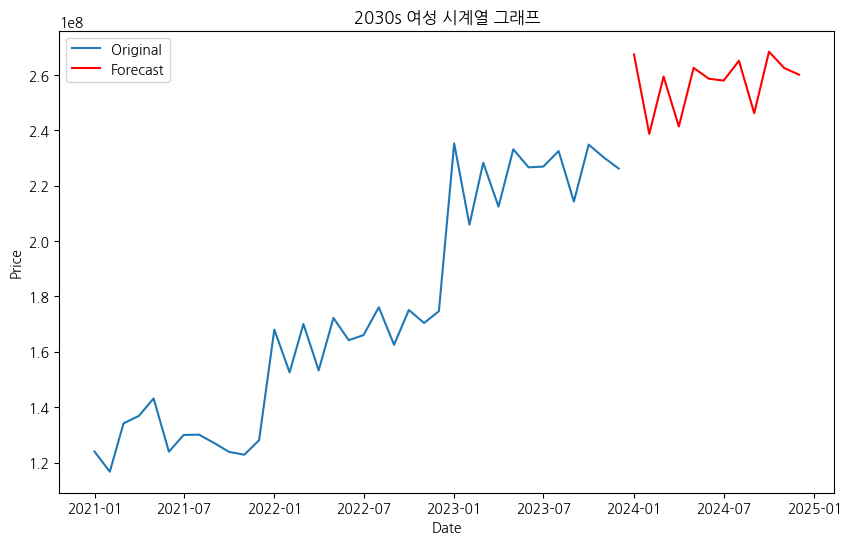

In [ ]:
data = df_2030f_time.copy()

from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt

# matplotlib converter 등록
register_matplotlib_converters()

# 'YearMonthStr'을 날짜 형식으로 변환하고 인덱스로 설정
data['YearMonthStr'] = pd.to_datetime(data['YearMonthStr'])
data.set_index('YearMonthStr', inplace=True)

# SARIMA 모델 파라미터 선택
# 일반적으로 계절성이 있는 데이터의 경우, p, d, q는 비계절성 요소에 대한 것이고,
# P, D, Q, S는 계절성 요소를 나타냅니다. 여기서는 1년 계절성을 고려하므로 S=12로 설정합니다.
# 모델의 파라미터는 통상적인 방법으로 선택되며, 여기서는 예시로 설정합니다.
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 12

# 모델 학습
model = SARIMAX(data['Price'], order=(p, d, q), seasonal_order=(P, D, Q, S))
model_fit = model.fit(disp=False)

# 다음 1년(12개월) 동안의 데이터 예측
forecast = model_fit.forecast(steps=12)

# 원본 데이터와 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Price'], label='Original')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('2030s 여성 시계열 그래프')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## 2030s 남자

In [ ]:
# 2030s 남자 auto_arima
ts_model = auto_arima(df_2030m_timeseries, max_p=3, max_q=3, d=2,
                      trace=True, error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1238.405, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1260.826, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1238.109, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1235.596, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1234.680, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=1236.854, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1235.538, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1234.138, Time=0.03 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=1234.314, Time=0.03 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=1236.694, Time=0.04 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0]          
Total fit time: 0.354 seconds


In [ ]:
# Train 데이터 이용, AR(1), I(2, 차분), MA(1)인 SARIMA 모델
ts_model_2030m = ARIMA(df_2030m_timeseries, order = (1, 2, 1), seasonal_order=(1,1,1,12))  # 계절성 주기가 12임을 알고 있음

# 데이터 적합
ts_result_2030m = ts_model_2030m.fit()
print(ts_result_2030m.summary())

                                    SARIMAX Results                                     
Dep. Variable:                            Price   No. Observations:                   36
Model:             ARIMA(1, 2, 1)x(1, 1, 1, 12)   Log Likelihood                -379.465
Date:                          Wed, 20 Mar 2024   AIC                            768.930
Time:                                  03:13:51   BIC                            774.385
Sample:                              01-01-2021   HQIC                           770.215
                                   - 12-01-2023                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5558      0.328     -1.692      0.091      -1.200       0.088
ma.L1         -0.9435      0.085    -11.058      0.

In [ ]:
data2 = df_2030m_time.copy()

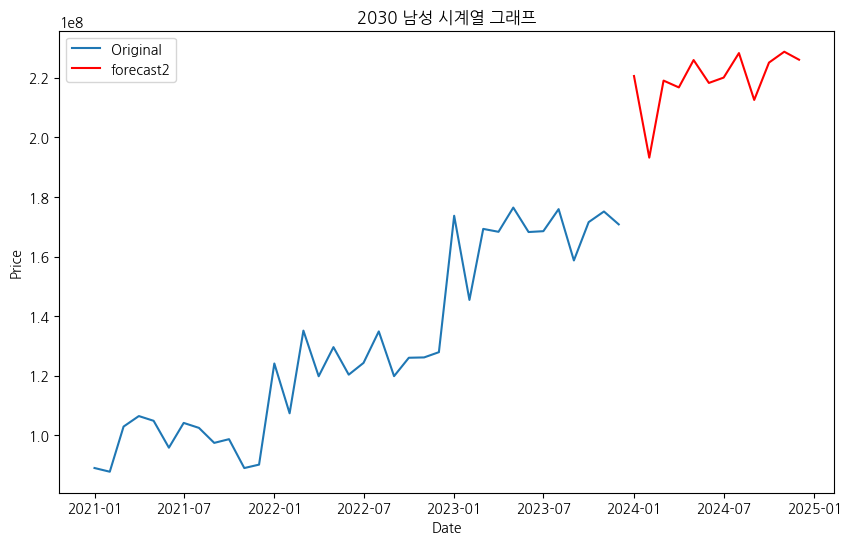

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt

# matplotlib converter 등록
register_matplotlib_converters()

# 'YearMonthStr'을 날짜 형식으로 변환하고 인덱스로 설정
data2['YearMonthStr'] = pd.to_datetime(data2['YearMonthStr'])
data2.set_index('YearMonthStr', inplace=True)

# SARIMA 모델 파라미터 선택
# 일반적으로 계절성이 있는 데이터의 경우, p, d, q는 비계절성 요소에 대한 것이고,
# P, D, Q, S는 계절성 요소를 나타냅니다. 여기서는 1년 계절성을 고려하므로 S=12로 설정합니다.

# 모델 학습
model = SARIMAX(data2['Price'], order=(1, 2, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# 다음 1년(12개월) 동안의 데이터 예측
forecast2 = model_fit.forecast(steps=12)

# 원본 데이터와 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(data2.index, data2['Price'], label='Original')
plt.plot(forecast2.index, forecast2, label='forecast2', color='red')
plt.title('2030 남성 시계열 그래프')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## 4060s 여성

In [ ]:
# 신선식품, 가공식품 데이터프레임 생성
df_4060f = df[df["Combined"] == "4060s, 여성"]
df_4060m = df[df["Combined"] == "4060s, 남성"]

# 월별 매출액 시계열 자료로 변환
df_4060f_time = df_4060f.groupby('YearMonthStr')['Price'].sum().reset_index()
df_4060m_time = df_4060m.groupby('YearMonthStr')['Price'].sum().reset_index()

# 날짜를 인덱스로
df_4060f_timeseries = df_4060f_time.set_index(keys='YearMonthStr')
df_4060m_timeseries = df_4060m_time.set_index(keys='YearMonthStr')

In [ ]:
# 4060s 여자 auto_arima
ts_model = auto_arima(df_4060f_timeseries, max_p=3, max_q=3, d=2,
                      trace=True, error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=1216.626, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1241.957, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1215.301, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=1217.516, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=1213.806, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=1215.303, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=1215.003, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=1212.497, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=1213.996, Time=0.02 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=1216.862, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=1213.470, Time=0.03 sec

Best model:  ARIMA(1,2,1)(0,0,0)[0]          
Total fit time: 0.251 seconds


In [ ]:
# Train 데이터 이용, AR(0), I(2, 차분), MA(1)인 SARIMA 모델
ts_model_4060f = ARIMA(df_4060f_timeseries, order = (0, 2, 1), seasonal_order=(1,1,1,12))  # 계절성 주기가 12임을 알고 있음

# 데이터 적합
ts_result_4060f = ts_model_4060f.fit()
print(ts_result_4060f.summary())

                                    SARIMAX Results                                     
Dep. Variable:                            Price   No. Observations:                   36
Model:             ARIMA(0, 2, 1)x(1, 1, 1, 12)   Log Likelihood                -384.516
Date:                          Wed, 20 Mar 2024   AIC                            777.033
Time:                                  03:13:57   BIC                            781.397
Sample:                              01-01-2021   HQIC                           778.061
                                   - 12-01-2023                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9031      0.462     -1.956      0.051      -1.808       0.002
ar.S.L12      -0.6191      1.414     -0.438      0.

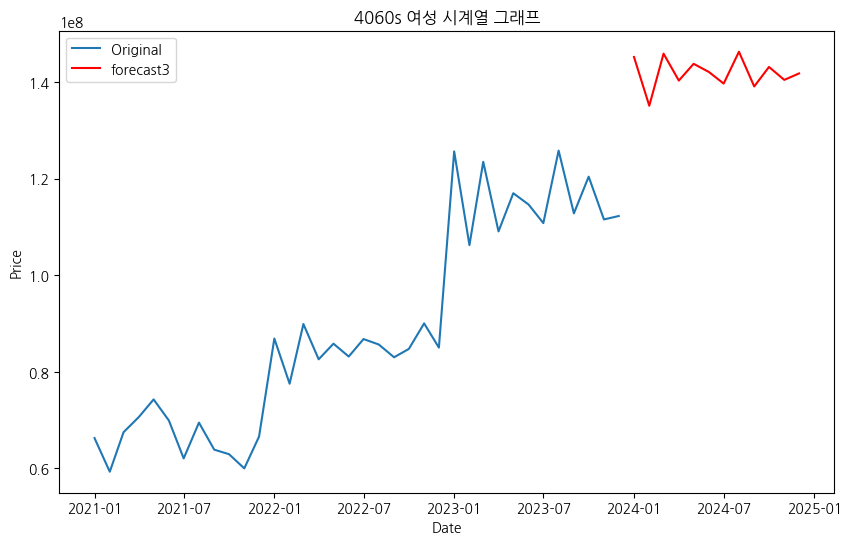

In [ ]:
data3 = df_4060f_time.copy()

from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt

# matplotlib converter 등록
register_matplotlib_converters()

# 'YearMonthStr'을 날짜 형식으로 변환하고 인덱스로 설정
data3['YearMonthStr'] = pd.to_datetime(data3['YearMonthStr'])
data3.set_index('YearMonthStr', inplace=True)

# SARIMA 모델 파라미터 선택
# 일반적으로 계절성이 있는 데이터의 경우, p, d, q는 비계절성 요소에 대한 것이고,
# P, D, Q, S는 계절성 요소를 나타냅니다. 여기서는 1년 계절성을 고려하므로 S=12로 설정합니다.
# 모델의 파라미터는 통상적인 방법으로 선택되며, 여기서는 예시로 설정합니다.
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 12

# 모델 학습
model = SARIMAX(data3['Price'], order=(p, d, q), seasonal_order=(P, D, Q, S))
model_fit = model.fit(disp=False)

# 다음 1년(12개월) 동안의 데이터 예측
forecast3 = model_fit.forecast(steps=12)

# 원본 데이터와 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(data3.index, data3['Price'], label='Original')
plt.plot(forecast3.index, forecast3, label='forecast3', color='red')
plt.title('4060s 여성 시계열 그래프')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## 4060s 남성

In [ ]:
# 4060s 남자 auto_arima
ts_model = auto_arima(df_4060m_timeseries, max_p=3, max_q=3, d=2,
                      trace=True, error_action='ignore')

In [ ]:
# Train 데이터 이용, AR(0), I(2, 차분), MA(1)인 SARIMA 모델
ts_model_4060m = ARIMA(df_2030m_timeseries, order = (0, 2, 1), seasonal_order=(1,1,1,12))  # 계절성 주기가 12임을 알고 있음

# 데이터 적합
ts_result_4060m = ts_model_4060m.fit()
print(ts_result_4060m.summary())

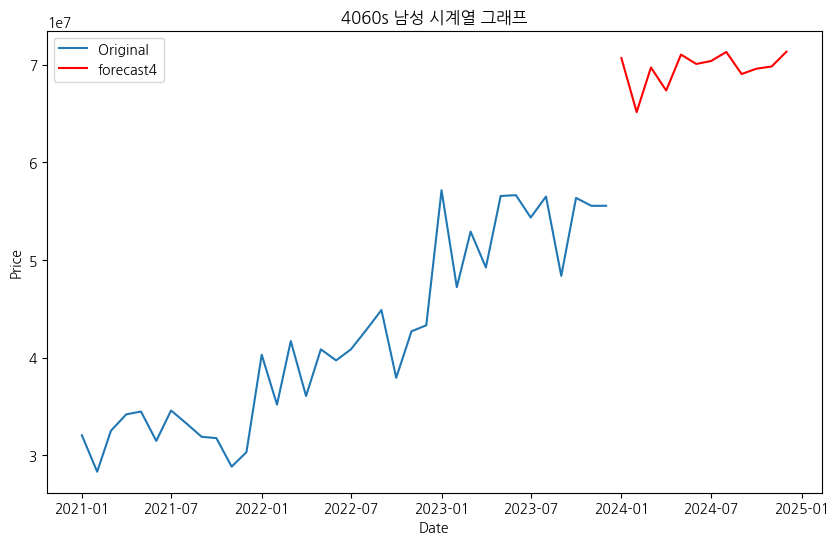

In [ ]:
data4 = df_4060m_time.copy()

from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt

# matplotlib converter 등록
register_matplotlib_converters()

# 'YearMonthStr'을 날짜 형식으로 변환하고 인덱스로 설정
data4['YearMonthStr'] = pd.to_datetime(data4['YearMonthStr'])
data4.set_index('YearMonthStr', inplace=True)

# SARIMA 모델 파라미터 선택
# 일반적으로 계절성이 있는 데이터의 경우, p, d, q는 비계절성 요소에 대한 것이고,
# P, D, Q, S는 계절성 요소를 나타냅니다. 여기서는 1년 계절성을 고려하므로 S=12로 설정합니다.
# 모델의 파라미터는 통상적인 방법으로 선택되며, 여기서는 예시로 설정합니다.
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 12

# 모델 학습
model = SARIMAX(data4['Price'], order=(p, d, q), seasonal_order=(P, D, Q, S))
model_fit = model.fit(disp=False)

# 다음 1년(12개월) 동안의 데이터 예측
forecast4 = model_fit.forecast(steps=12)

# 원본 데이터와 예측 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(data4.index, data4['Price'], label='Original')
plt.plot(forecast4.index, forecast4, label='forecast4', color='red')
plt.title('4060s 남성 시계열 그래프')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

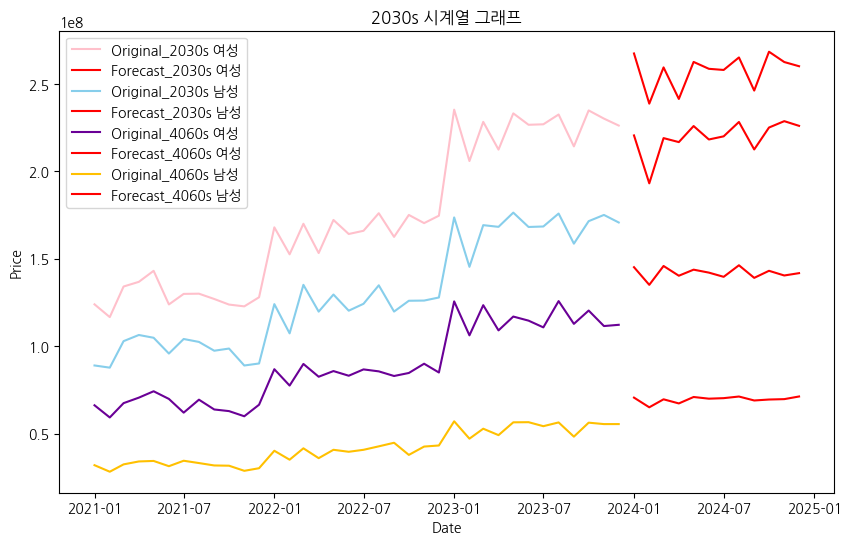

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(data.index, data['Price'], label='Original_2030s 여성', color = '#FFC0CB')
plt.plot(forecast.index, forecast, label='Forecast_2030s 여성', color='red')

plt.plot(data2.index, data2['Price'], label='Original_2030s 남성', color ='#87CEEB' )
plt.plot(forecast2.index, forecast2, label='Forecast_2030s 남성', color='red')

plt.plot(data3.index, data3['Price'], label='Original_4060s 여성', color = '#6A0096')
plt.plot(forecast3.index, forecast3, label='Forecast_4060s 여성', color='red')

plt.plot(data4.index, data4['Price'], label='Original_4060s 남성', color ='#FFC000' )
plt.plot(forecast4.index, forecast4, label='Forecast_4060s 남성', color='red')

plt.title('2030s 시계열 그래프')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()